In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import csv

# List of companies and their tickers
companies = [
    ('TATAMOTORS', 'NSE'),
    ('500570', 'BOM'),
    ('ZOMATO', 'NSE'),
    ('543320', 'BOM'),
    ('INFY', 'NSE'),
    ('500209', 'BOM'),
    ('HINDUNILVR', 'NSE'),
    ('500696', 'BOM'),
    ('SBIN', 'NSE'),
    ('500112', 'BOM'),
    ('ITC', 'NSE'),
    ('500875', 'BOM'),
    ('TCS', 'NSE'),
    ('532540', 'BOM'),
    ('RELIANCE', 'NSE'),
    ('500325', 'BOM'),
    ('HDFCBANK', 'NSE'),
    ('500180', 'BOM'),
    (' BHARTIARTL', 'NSE'),
    ('532454', 'BOM')
]

# Create a CSV file and write the header
with open('stock_prices.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Timestamp', 'Company', 'Exchange', 'Price'])

# Collect data
for i in range(100):
    for company, exchange in companies:
        url = f'https://www.google.com/finance/quote/{company}:{exchange}'
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        class1 = 'YMlKec fxKbKc'
        price_element = soup.find(class_=class1)

        if price_element:
            price = price_element.text.replace(',', '').replace('₹', '').strip()
        else:
            price = "Not Found"  # Handle the case when price is not found
            print(f"Price not found for {company}:{exchange}. Check the website and class name.")
            # Optionally, print the HTML content for debugging:
            # print(soup.prettify())

        timestamp = time.strftime('%Y-%m-%d %H:%M:%S')

        with open('stock_prices.csv', mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([timestamp, company, exchange, price])

        # Print the collected data
        #print(f"{timestamp}: {company} ({exchange}) - {price}")
        time.sleep(60)

Price not found for  BHARTIARTL:NSE. Check the website and class name.
Price not found for  BHARTIARTL:NSE. Check the website and class name.
Price not found for  BHARTIARTL:NSE. Check the website and class name.
Price not found for  BHARTIARTL:NSE. Check the website and class name.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data
data = pd.read_csv('stock_prices.csv')

# Convert timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Feature engineering: Extract day, month, year, hour, minute, second from timestamp
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year
data['Hour'] = data['Timestamp'].dt.hour
data['Minute'] = data['Timestamp'].dt.minute
data['Second'] = data['Timestamp'].dt.second

# Remove rows with "Not Found" in the 'Price' column
data = data[data['Price'] != 'Not Found']

# Convert 'Price' column to numeric
data['Price'] = pd.to_numeric(data['Price'])

# Prepare the data for the model
X = data[['Day', 'Month', 'Year', 'Hour', 'Minute', 'Second']]
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print("Model R^2 score:", model.score(X_test, y_test))


Model R^2 score: 0.0037952940207435226


In [ ]:
# Predict the stock prices for tomorrow
future_data = X_test.copy()
future_data['Day'] = future_data['Day'] + 1
future_predictions = model.predict(future_data)

# Calculate the predicted increase
future_data['Predicted_Price'] = future_predictions
future_data['Actual_Price'] = y_test.values
future_data['Increase'] = future_data['Predicted_Price'] - future_data['Actual_Price']

# Recommend the company with the highest predicted increase
recommendation = future_data.loc[future_data['Increase'].idxmax()]
print("Recommended company for investment:")
print(recommendation)


Recommended company for investment:
Day                  16.000000
Month                 7.000000
Year               2024.000000
Hour                  8.000000
Minute               12.000000
Second               40.000000
Predicted_Price    1843.083638
Actual_Price        228.200000
Increase           1614.883638
Name: 303, dtype: float64


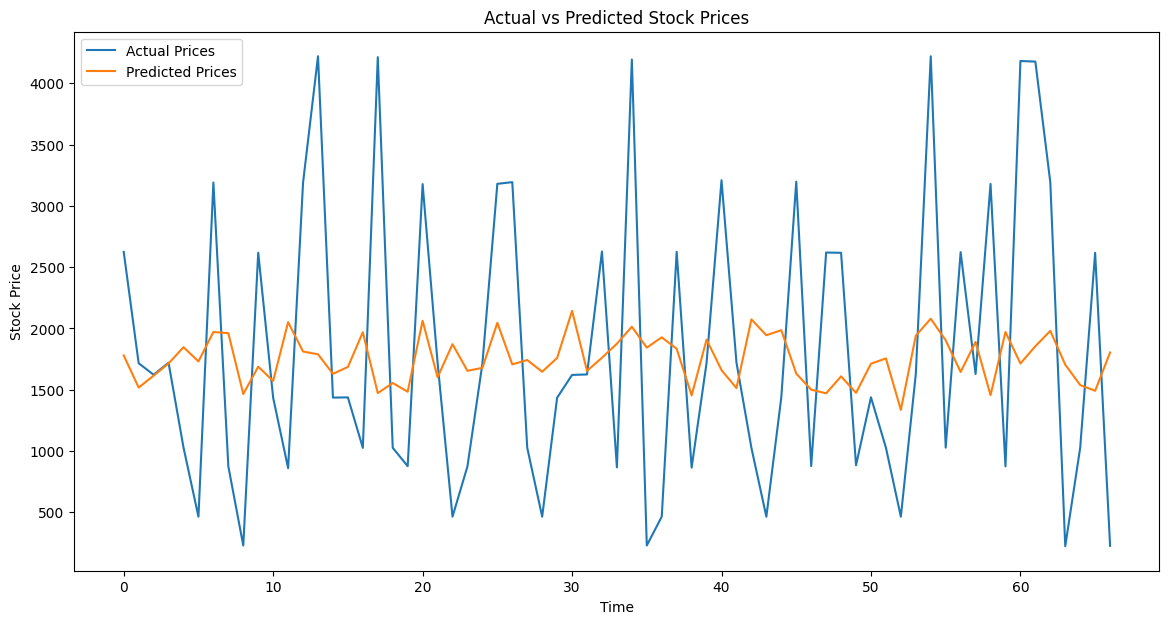

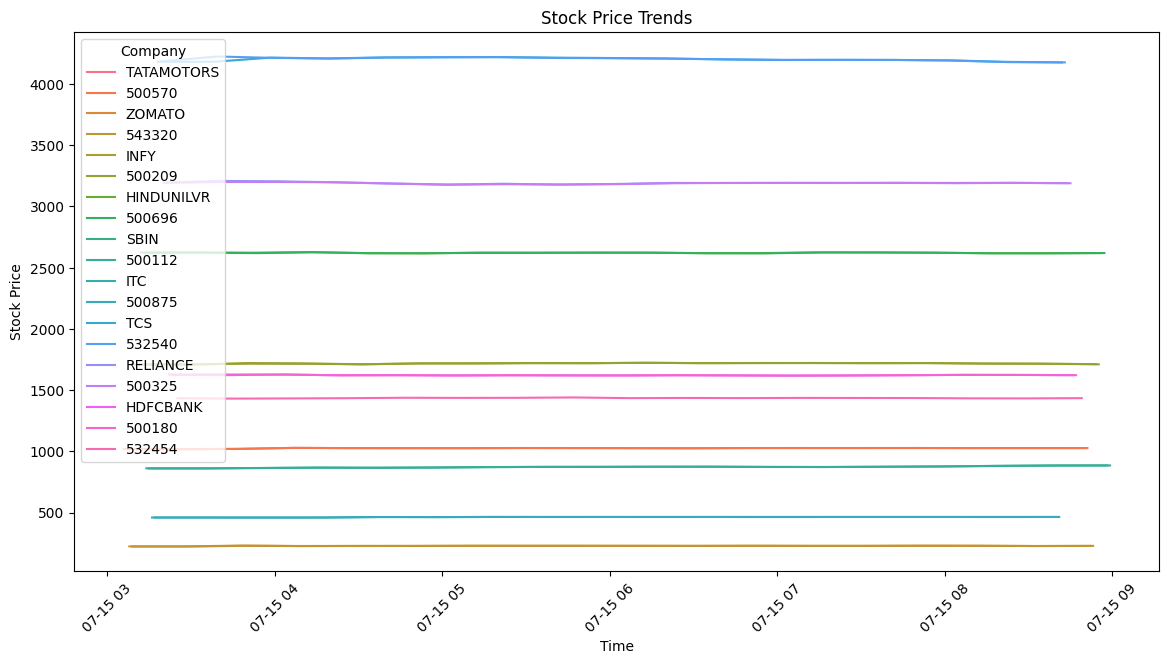

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# Plot the price trends for each company
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Timestamp', y='Price', hue='Company')
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Trends')
plt.show()
